# Compute drawdown

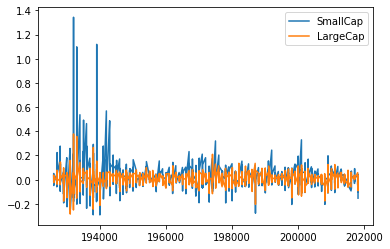

In [3]:
import pandas as pd
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [4]:
rets.head()

SmallCap  LargeCap
192607   -0.0145    0.0329
192608    0.0512    0.0370
192609    0.0093    0.0067
192610   -0.0484   -0.0243
192611   -0.0078    0.0270

In [5]:
rets.index


Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [7]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')

In [8]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

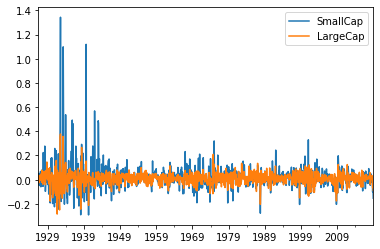

In [9]:
rets.plot.line()

In [10]:
rets.index = rets.index.to_period('M')

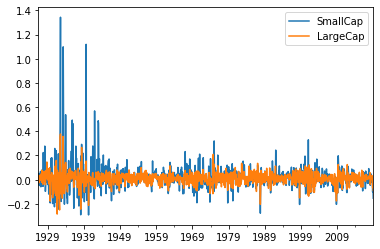

In [11]:
rets.plot.line()


In [12]:
rets.heda()


AttributeError: 'DataFrame' object has no attribute 'heda'

In [13]:
rets.head()

SmallCap  LargeCap
1926-07   -0.0145    0.0329
1926-08    0.0512    0.0370
1926-09    0.0093    0.0067
1926-10   -0.0484   -0.0243
1926-11   -0.0078    0.0270

In [14]:
rets['1975']

SmallCap  LargeCap
1975-01    0.3202    0.1286
1975-02    0.0657    0.0613
1975-03    0.0989    0.0414
1975-04    0.0288    0.0531
1975-05    0.0811    0.0610
1975-06    0.0779    0.0524
1975-07    0.0218   -0.0703
1975-08   -0.0525   -0.0177
1975-09   -0.0351   -0.0468
1975-10   -0.0009    0.0620
1975-11    0.0129    0.0323
1975-12   -0.0042   -0.0159

In [15]:
rets.info

<bound method DataFrame.info of          SmallCap  LargeCap
1926-07   -0.0145    0.0329
1926-08    0.0512    0.0370
1926-09    0.0093    0.0067
1926-10   -0.0484   -0.0243
1926-11   -0.0078    0.0270
...           ...       ...
2018-08    0.0241    0.0234
2018-09   -0.0168    0.0087
2018-10   -0.1002   -0.0657
2018-11   -0.0365    0.0253
2018-12   -0.1531   -0.0890

[1110 rows x 2 columns]>

In [16]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdowns

In [17]:
wealth_index = 1000*(1+rets['LargeCap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

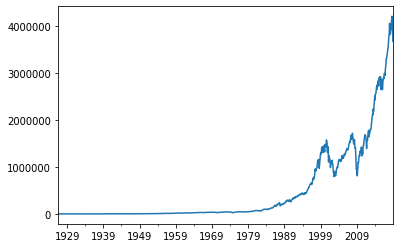

In [18]:
wealth_index.plot.line()

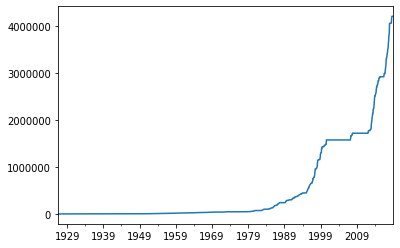

In [19]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot.line()

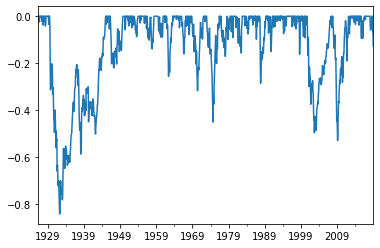

In [20]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [21]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [22]:
drawdown.min()

-0.8400375277943123

In [24]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [25]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a dateaframe that contains:
    the wealth index
    previous peaks
    percent dropdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks =wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        'Wealth':wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

In [27]:
drawdown(rets["LargeCap"]).head()

Wealth        Peaks  Drawdown
1926-07  1032.900000  1032.900000    0.0000
1926-08  1071.117300  1071.117300    0.0000
1926-09  1078.293786  1078.293786    0.0000
1926-10  1052.091247  1078.293786   -0.0243
1926-11  1080.497711  1080.497711    0.0000

In [30]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].head()

Wealth        Peaks
1926-07  1032.900000  1032.900000
1926-08  1071.117300  1071.117300
1926-09  1078.293786  1078.293786
1926-10  1052.091247  1078.293786
1926-11  1080.497711  1080.497711

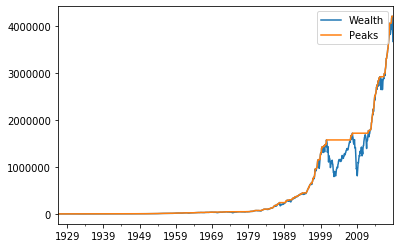

In [31]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].plot()

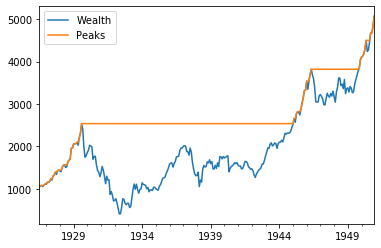

In [34]:
drawdown(rets[:'1950']["LargeCap"])[["Wealth", "Peaks"]].plot()

In [35]:
drawdown(rets["LargeCap"]).head()

Wealth        Peaks  Drawdown
1926-07  1032.900000  1032.900000    0.0000
1926-08  1071.117300  1071.117300    0.0000
1926-09  1078.293786  1078.293786    0.0000
1926-10  1052.091247  1078.293786   -0.0243
1926-11  1080.497711  1080.497711    0.0000

In [43]:
drawdown(rets["LargeCap"])['Drawdown'].min()

-0.8400375277943123

In [40]:
drawdown(rets["SmallCap"])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [42]:
drawdown(rets["LargeCap"])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [46]:
drawdown(rets['1940':]["SmallCap"])['Drawdown'].min()

-0.7000596091967917

In [47]:
drawdown(rets['1940':]["SmallCap"])['Drawdown'].idxmin()

Period('1974-12', 'M')

In [48]:
drawdown(rets['1975':]["SmallCap"])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [49]:
drawdown(rets['1975':]["SmallCap"])['Drawdown'].min()

-0.6312068077252386

In [50]:
drawdown(rets['1975':]["LargeCap"])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [51]:
drawdown(rets['1975':]["LargeCap"])['Drawdown'].min()

-0.5280945042309303